<a href="https://colab.research.google.com/github/nathamon24/image-processing/blob/main/Activity/Activity%234/lab4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

## **Step1 : Image reshape from 3D image (H, W, Ch) -> 4D image (1, H, W, Ch)**

In [55]:
original_img = cv2.imread("/content/img1.JPG")
original_rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
#Image resize (H, W) -> (224, 224
resized_img = cv2.resize(original_rgb_img, (224, 224))
img_array = img_to_array(resized_img)
img_4d = expand_dims(img_array, axis=0)
print(img_4d.shape)

(1, 224, 224, 3)


## **Step3 : Image subtract dataset mean of R, G, B**

In [61]:
img_mean = [np.mean(img_4d[:,:,0]), np.mean(img_4d[:,:,1]), np.mean(img_4d[:,:,2])]
img = np.copy(resized_img).astype(np.float)
img[:,:,0] -= img_mean[0]
img[:,:,1] -= img_mean[1]
img[:,:,2] -= img_mean[2]

## **Step4 :  Color conversion**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


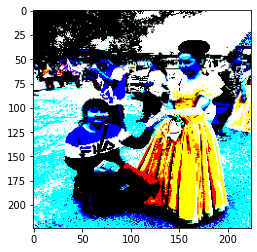

In [64]:
result_img = img[:, :, [2,1,0]] #RGB to BGR
plt.imshow(result_img)